<a href="https://colab.research.google.com/github/JP109/ML-Basics/blob/main/Supervised%20Learning%20Algorithms/Classification%20Algorithms/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Binomial logistic regression with:**
1. **sklearn**
2. **statsmodels**

**1. with sklearn**

In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

The array x is required to be two-dimensional. It should have one column for each input, and the number of rows should be equal to the number of observations. To make x two-dimensional, you apply .reshape() with the arguments -1 to get as many rows as needed and 1 to get one column. 

In [3]:
#Create dummy data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [4]:
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


x has two dimensions:

1. One column for a single input
2. Ten rows, each corresponding to one observation

y is one-dimensional with ten items. Again, each item corresponds to one observation.

In [5]:
# Create model
model = LogisticRegression(solver='liblinear', random_state=0)

Parameters:
1. **penalty**: A string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

2. **dual**: A Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).

3. **tol**: A floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.

4. **C**: A positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.

5. **fit_intercept**: A Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).

6. **intercept_scaling**: floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.

7. **class_weight**: A dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.

8. **random_state** is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.

9. **solver** is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

10. **max_iter** is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.

11. **multi_class** is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.

12. **verbose** is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.

13. **warm_start** is a Boolean (False by default) that decides whether to reuse the previously obtained solution.

14. **n_jobs** is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.

15. **l1_ratio** is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

You should carefully match the solver and regularization method for several reasons:

'liblinear' solver doesn’t work without regularization.
'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
'saga' is the only solver that supports elastic-net regularization.

In [6]:
# Train model
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# You can use the fact that .fit() returns the model instance and chain the last two statements. They are equivalent to the following line of code:
# model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [8]:
# Model attributes
print(model.classes_)
print(model.intercept_)
print(model.coef_)

[0 1]
[-1.04608067]
[[0.51491375]]


In [ ]:
# Model evaluation
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [ ]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.score(x, y)

0.9

In [ ]:
# Example of logistic regression model with regulariztion strength = 10
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**2. with statsmodels**: When you want detailed statistics related to the model/results

In [9]:
# Import packages
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


StatsModels doesn’t take the intercept 𝑏₀ into account, and you need to include the additional column of ones in x. You do that with add_constant():

add_constant() takes the array x as the argument and returns a new array with the additional column of ones. This is how x and y look:

In [10]:
# Create dummy data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)

In [11]:
x

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

The first column of x corresponds to the intercept 𝑏₀. The second column contains the original values of x.

In [12]:
# Create model
model = sm.Logit(y, x)

In [13]:
# Train model
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [14]:
# b0 and b1 values (intercept and slope respectively)
result.params

array([-1.972805  ,  0.82240094])

In [15]:
# Predict here gives probabilities rather than predictions, given by scikit learns predict
result.predict(x)

array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

In [16]:
# Get actual predictions
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [17]:
# Confusion matrix here has floats instead of integers
result.pred_table()

array([[2., 1.],
       [1., 6.]])

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.4263
Time:                        15:34:41   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

In [19]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2021-10-10 15:34 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""

## **2. Multinomial Logistic Regression**

One popular approach for adapting logistic regression to multi-class classification problems is to split the multi-class classification problem into multiple binary classification problems and fit a standard logistic regression model on each subproblem. Techniques of this type include one-vs-rest and one-vs-one wrapper models.

An alternate approach involves changing the logistic regression model to support the prediction of multiple class labels directly. Specifically, to predict the probability that an input example belongs to each known class label.Changing logistic regression from binomial to multinomial probability requires a change to the loss function used to train the model (e.g. log loss to cross-entropy loss), and a change to the output from a single probability value to one probability for each class label.

In [ ]:
# test classification dataset
from collections import Counter
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# summarize the dataset
print(X.shape, y.shape)
print(Counter(y))

(1000, 10) (1000,)
Counter({1: 334, 2: 334, 0: 332})


The LogisticRegression class can be configured for multinomial logistic regression by setting the “multi_class” argument to “multinomial” and the “solver” argument to a solver that supports multinomial logistic regression, such as “lbfgs“

In [ ]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

It is a good practice to evaluate classification models using repeated stratified k-fold cross-validation. The stratification ensures that each cross-validation fold has approximately the same distribution of examples in each class as the whole training dataset.

We will use three repeats with 10 folds, which is a good default, and evaluate model performance using classification accuracy given that the classes are balanced.

In [21]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.681 (0.042)


In [20]:
# make a prediction with a multinomial logistic regression model, on new data
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of input data
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
# predict the class label
yhat = model.predict([row])
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


A benefit of multinomial logistic regression is that it can predict calibrated probabilities across all known class labels in the dataset.

This can be achieved by calling the predict_proba() function on the model.

In [ ]:
# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of input data
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
# predict the class label
yhat = model.predict([row])
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


**Tuning multinomial logistic regression**

By default, the LogisticRegression class uses the L2 penalty with a weighting of coefficients set to 1.0. The type of penalty can be set via the “penalty” argument with values of “l1“, “l2“, “elasticnet” (e.g. both), although not all solvers support all penalty types. The weighting of the coefficients in the penalty can be set via the “C” argument.

In [22]:
# define the multinomial logistic regression model with a default penalty
LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The weighting for the penalty is actually the inverse weighting, perhaps penalty = 1 – C.

This means that values close to 1.0 indicate very little penalty and values close to zero indicate a strong penalty. A C value of 1.0 may indicate no penalty at all.

*   C close to 1.0: Light penalty.
*   C close to 0.0: Strong penalty.

The penalty can be disabled by setting the “penalty” argument to the string “none“.

In [23]:
# define the multinomial logistic regression model without a penalty
LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

It is common to test penalty values on a log scale in order to quickly discover the scale of penalty that works well for a model. Once found, further tuning at that scale may be beneficial.

We will explore the L2 penalty with weighting values in the range from 0.0001 to 1.0 on a log scale, in addition to no penalty or 0.0.

The complete example of evaluating L2 penalty values for multinomial logistic regression is listed below.

>0.0000 0.777 (0.037)
>0.0001 0.683 (0.049)
>0.0010 0.762 (0.044)
>0.0100 0.775 (0.040)
>0.1000 0.774 (0.038)
>1.0000 0.777 (0.037)


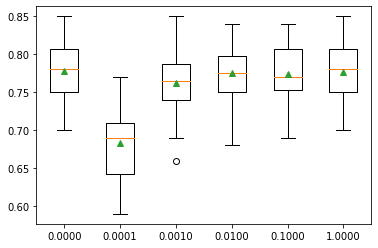

In [24]:
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that a C value of 1.0 has the best score of about 77.7 percent, which is the same as using no penalty that achieves the same score.

A box and whisker plot is created for the accuracy scores for each configuration and all plots are shown side by side on a figure on the same scale for direct comparison.

In this case, we can see that the larger penalty we use on this dataset (i.e. the smaller the C value), the worse the performance of the model.